In [1]:
import pandas as pd
import numpy as np
import warnings
import time

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error

from pmdarima.arima import auto_arima

warnings.filterwarnings('ignore')

/Users/benmagevney/miniconda/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
# read datasets 
enc = pd.read_csv('../../data/regional_datasets/univariate/enc_data_univ.csv')
esc = pd.read_csv('../../data/regional_datasets/univariate/esc_data_univ.csv')
mid_atlantic = pd.read_csv('../../data/regional_datasets/univariate/mid_atlantic_data_univ.csv')
mountain = pd.read_csv('../../data/regional_datasets/univariate/mountain_data_univ.csv')
new_england = pd.read_csv('../../data/regional_datasets/univariate/new_england_data_univ.csv')
pacific = pd.read_csv('../../data/regional_datasets/univariate/pacific_data_univ.csv')
south_atlantic = pd.read_csv('../../data/regional_datasets/univariate/south_atlantic_data_univ.csv')
wnc = pd.read_csv('../../data/regional_datasets/univariate/wnc_data_univ.csv')
wsc = pd.read_csv('../../data/regional_datasets/univariate/wsc_data_univ.csv')
datasets = [enc, esc, mid_atlantic, mountain, new_england, pacific, south_atlantic, wnc, wsc]
for df in datasets:
    df.set_index(pd.to_datetime(df['date']), inplace=True)
    df.drop(columns=["Unnamed: 0", "date"], axis=1, inplace=True)
    df.sort_index(inplace=True)


In [7]:
# ignore values before march 
enc = enc[enc.index >= "2020-03-01"]
esc = esc[esc.index >= "2020-03-01"]
mid_atlantic = mid_atlantic[mid_atlantic.index >= "2020-03-01"]
mountain = mountain[mountain.index >= "2020-03-01"]
new_england = new_england[new_england.index >= "2020-03-01"]
pacific = pacific[pacific.index >= "2020-03-01"]
south_atlantic = south_atlantic[south_atlantic.index >= "2020-03-01"]
wnc = wnc[wnc.index >= "2020-03-01"]
wsc = wsc[wsc.index >= "2020-03-01"]

# AutoARIMA

In [12]:
def baseline_auto_arima(df, plot=False):
    region = df["region"].iloc[0]
    print(f"Training model for {region}...")

    size = round(df.shape[0]*0.15)
    train = df.iloc[:-size]['new_confirmed']
    test = df.iloc[-size:]['new_confirmed']

    model = auto_arima(train, seasonal=True, m=7, suppress_warnings=True, stepwise=True)
    print(model.aic())
    print(model.summary())

    # pred, conf_int = model.predict(n_periods=size, return_conf_int=True)
    pred = model.predict(n_periods=size)

    # calculate metrics
    mae = mean_absolute_error(test, pred)
    mse = mean_squared_error(test, pred)
    rmse = mean_squared_error(test, pred, squared=False)
    mase = mean_absolute_scaled_error(test, pred, y_train=train)

    print(f'MAE: {round(mae, 2)}')
    print(f'MSE: {round(mse, 2)}')
    print(f'RMSE: {round(rmse, 2)}')
    print(f'MASE: {round(mase, 2)}')

    # plot predictions
    if plot:
        plt.figure(figsize=(15, 5))
        plt.title(f'AutoARIMA Predictions for {region}')
        plt.plot(test.index, test, label='True')
        plt.plot(pred.index, pred, label='Predicted')
        # uncomment to show confidence interval
        # plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')
        plt.legend() 
        plt.show()

Training model for East North Central...
17404.109245510605
MAE: 8140.37
MSE: 99643446.56
RMSE: 9982.16
MASE: 1.03


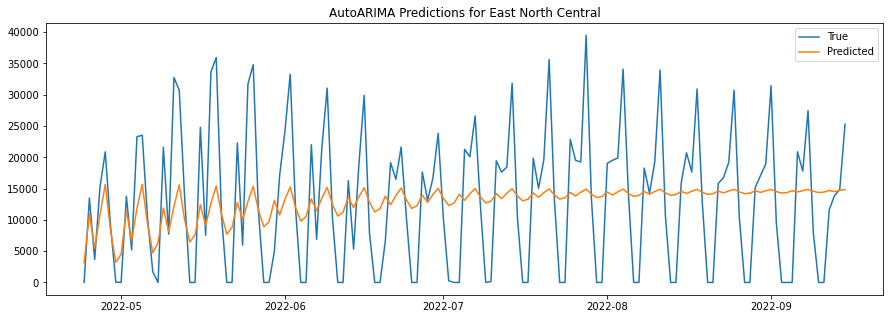


Training model for East South Central...
16483.99283256719
MAE: 8769.11
MSE: 123340474.54
RMSE: 11105.88
MASE: 2.65


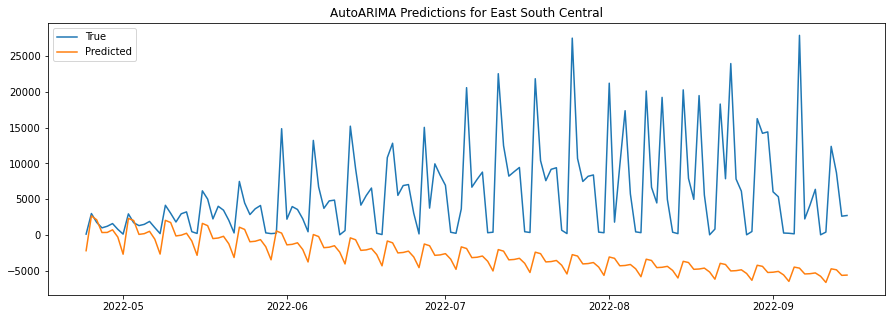


Training model for Mid-Atlantic...
16130.920753114598
MAE: 5396.3
MSE: 45850957.2
RMSE: 6771.33
MASE: 2.54


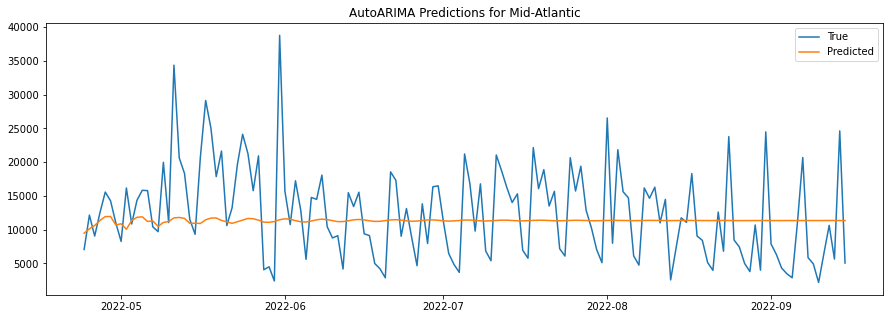


Training model for Mountain...
16585.170813962166
MAE: 4668.99
MSE: 59560187.61
RMSE: 7717.52
MASE: 1.48


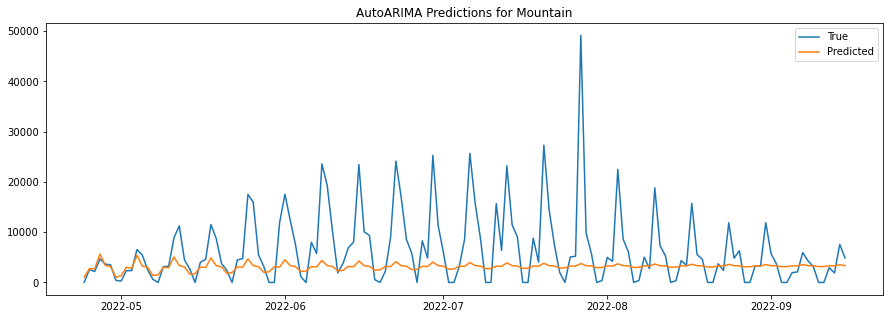


Training model for New England...
16236.335004395216
MAE: 3623.15
MSE: 19211296.62
RMSE: 4383.07
MASE: 1.45


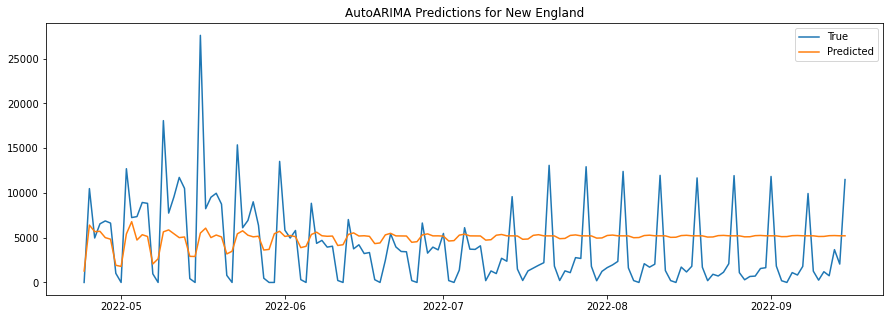


Training model for Pacific...
17635.132948943276
MAE: 23973.45
MSE: 776650592.72
RMSE: 27868.45
MASE: 3.58


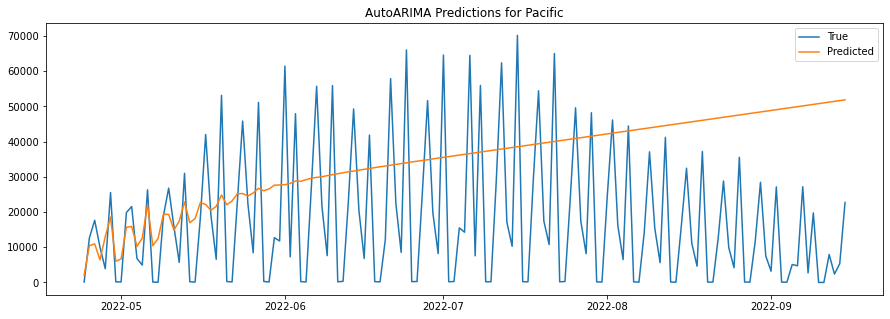


Training model for South Atlantic...
18345.25445979927
MAE: 15259.87
MSE: 485535337.88
RMSE: 22034.87
MASE: 1.46


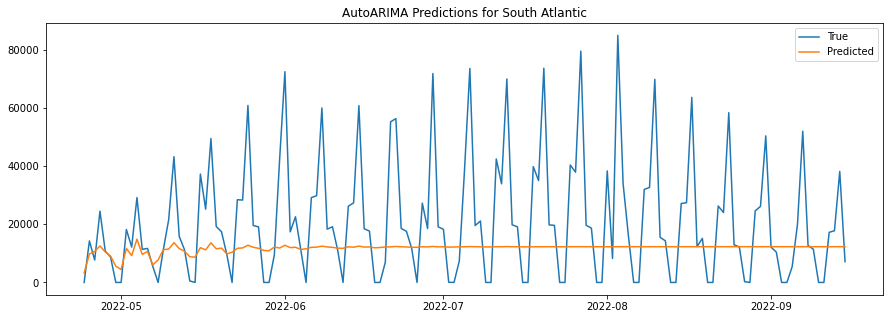


Training model for West North Central...
16309.910383865119
MAE: 5747.37
MSE: 48138594.24
RMSE: 6938.2
MASE: 1.84


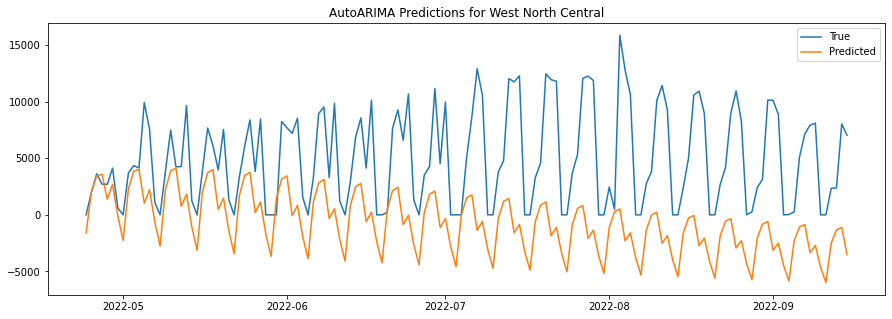


Training model for West South Central...
17247.884423634117
MAE: 7233.79
MSE: 96766453.88
RMSE: 9836.99
MASE: 1.64


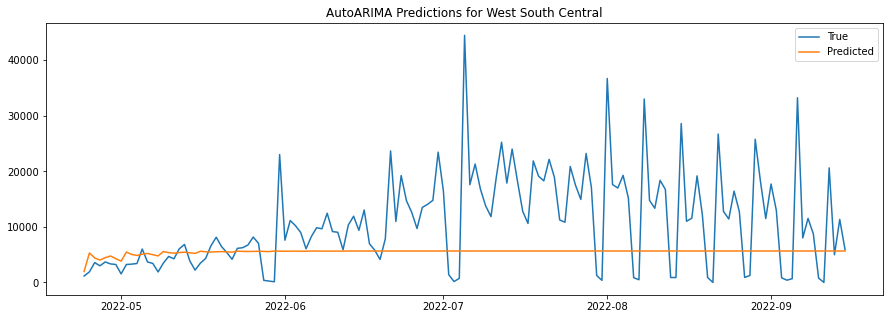


--- 2486.3 seconds ---


In [5]:
start_time = time.time()
for df in datasets:
    baseline_auto_arima(df, plot=True)
    print("")
print(f"--- {round(time.time() - start_time, 2)} seconds ---")

Training model for East North Central...
17404.109245510605
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  823
Model:             SARIMAX(4, 1, 2)x(2, 0, [], 7)   Log Likelihood               -8693.055
Date:                            Sun, 10 Mar 2024   AIC                          17404.109
Time:                                    21:28:57   BIC                          17446.515
Sample:                                01-22-2020   HQIC                         17420.379
                                     - 04-23-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2855      0.024    -54.327      0.000

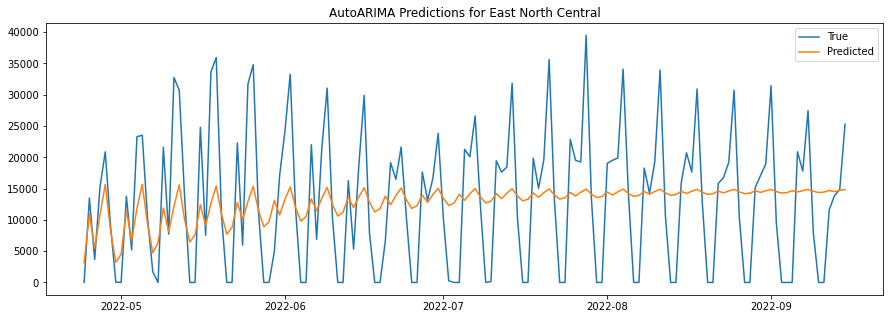


Training model for East South Central...
16483.99283256719
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  823
Model:             SARIMAX(5, 1, 2)x(1, 0, 2, 7)   Log Likelihood               -8230.996
Date:                           Sun, 10 Mar 2024   AIC                          16483.993
Time:                                   21:33:09   BIC                          16535.822
Sample:                               01-22-2020   HQIC                         16503.878
                                    - 04-23-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8673      0.025     34.856      0.000       0

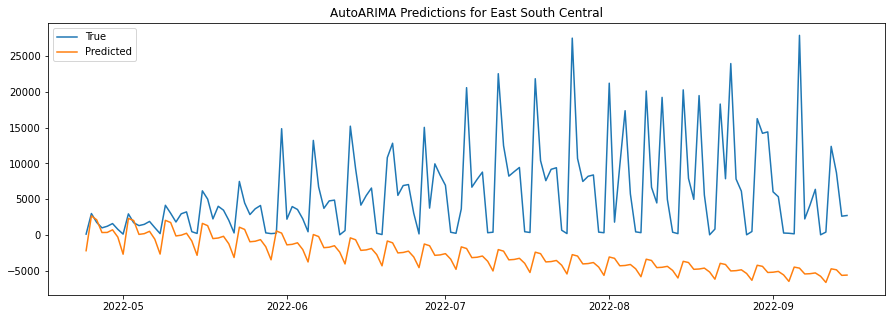


Training model for Mid-Atlantic...
16130.920753114598
                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  823
Model:             SARIMAX(4, 1, 5)x(1, 0, [1, 2], 7)   Log Likelihood               -8052.460
Date:                                Sun, 10 Mar 2024   AIC                          16130.921
Time:                                        21:42:07   BIC                          16192.173
Sample:                                    01-22-2020   HQIC                         16154.421
                                         - 04-23-2022                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1774      

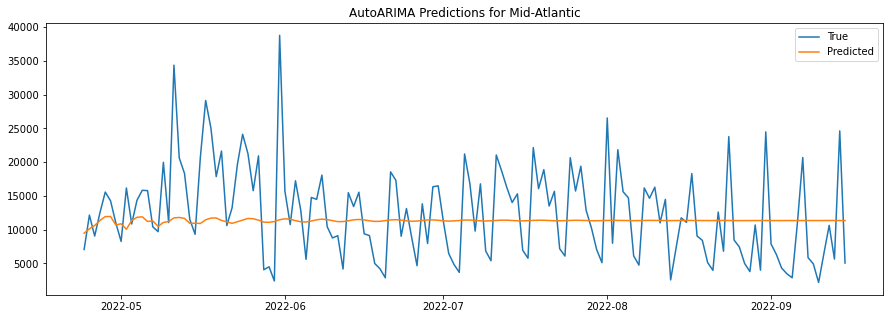


Training model for Mountain...
16585.170813962166
                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  823
Model:             SARIMAX(3, 1, 3)x(2, 0, [1, 2], 7)   Log Likelihood               -8281.585
Date:                                Sun, 10 Mar 2024   AIC                          16585.171
Time:                                        21:46:21   BIC                          16637.000
Sample:                                    01-22-2020   HQIC                         16605.056
                                         - 04-23-2022                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9363      0.02

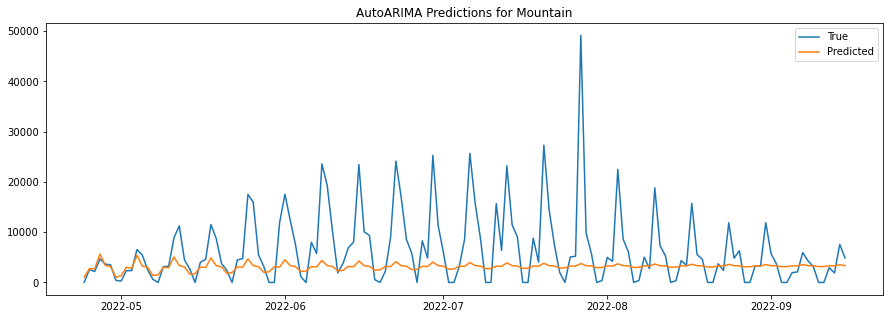


Training model for New England...
16236.335004395216
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  823
Model:             SARIMAX(5, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -8108.168
Date:                             Sun, 10 Mar 2024   AIC                          16236.335
Time:                                     21:49:55   BIC                          16283.452
Sample:                                 01-22-2020   HQIC                         16254.412
                                      - 04-23-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8999      0.030    -63.235      0.0

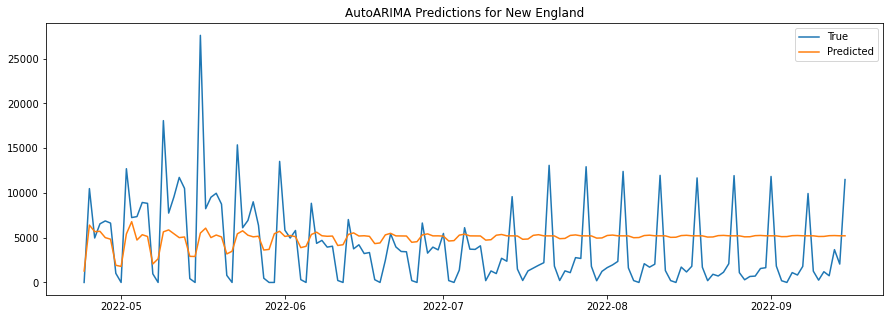


Training model for Pacific...
17635.132948943276
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  823
Model:             SARIMAX(4, 1, 2)x(2, 0, 2, 7)   Log Likelihood               -8805.566
Date:                           Sun, 10 Mar 2024   AIC                          17635.133
Time:                                   21:51:41   BIC                          17691.674
Sample:                               01-22-2020   HQIC                         17656.826
                                    - 04-23-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     42.5791     47.315      0.900      0.368     -50.157     1

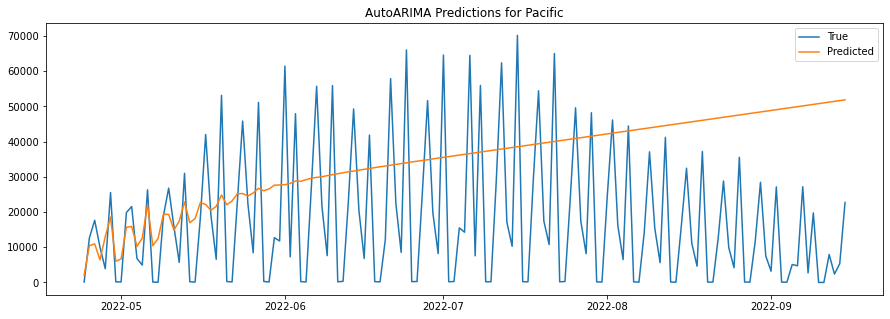


Training model for South Atlantic...
18345.25445979927
                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  823
Model:             SARIMAX(5, 1, 3)x(1, 0, [1, 2], 7)   Log Likelihood               -9160.627
Date:                                Sun, 10 Mar 2024   AIC                          18345.254
Time:                                        21:57:39   BIC                          18401.795
Sample:                                    01-22-2020   HQIC                         18366.947
                                         - 04-23-2022                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2519     

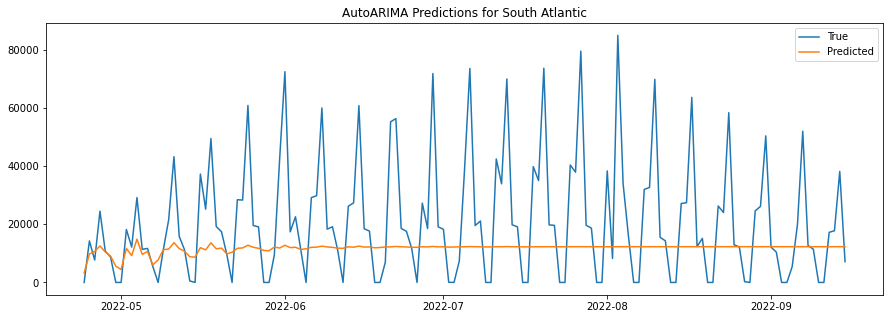


Training model for West North Central...
16309.910383865119
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  823
Model:             SARIMAX(4, 1, 2)x(2, 0, 2, 7)   Log Likelihood               -8143.955
Date:                           Sun, 10 Mar 2024   AIC                          16309.910
Time:                                   22:01:27   BIC                          16361.740
Sample:                               01-22-2020   HQIC                         16329.795
                                    - 04-23-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7358      0.059     12.448      0.000       

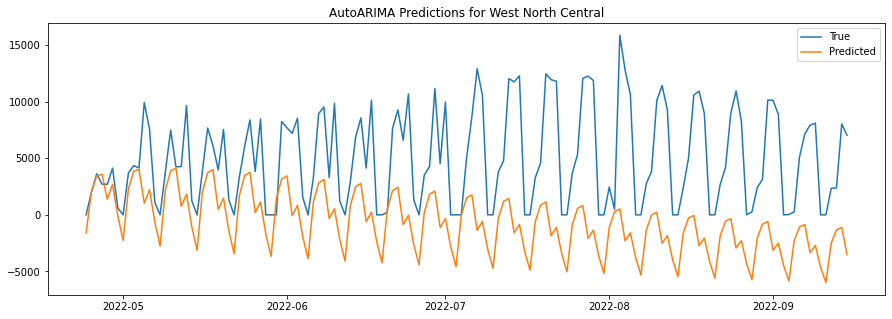


Training model for West South Central...
17247.884423634117
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  823
Model:             SARIMAX(2, 1, 2)x(1, 0, [], 7)   Log Likelihood               -8617.942
Date:                            Sun, 10 Mar 2024   AIC                          17247.884
Time:                                    22:02:38   BIC                          17276.155
Sample:                                01-22-2020   HQIC                         17258.731
                                     - 04-23-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0512      0.032     32.936      0.00

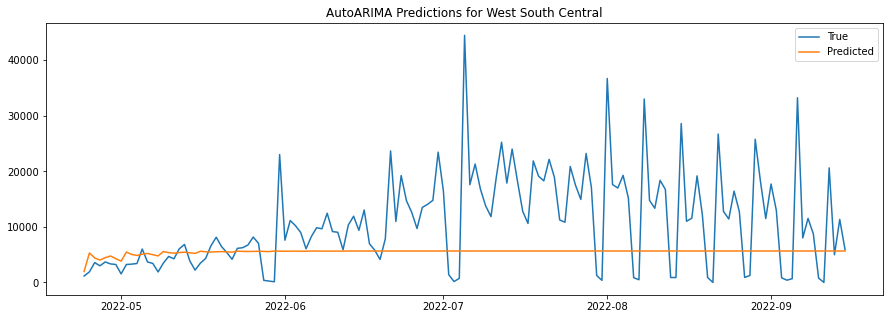


--- 2174.45 seconds ---


In [13]:
start_time = time.time()
for df in datasets:
    baseline_auto_arima(df, plot=True)
    print("")
print(f"--- {round(time.time() - start_time, 2)} seconds ---")

In [9]:
def baseline_auto_arima2(df, plot=False):
    region = df["region"].iloc[0]
    print(f"Training model for {region}...")

    size = round(df.shape[0]*0.15)
    train = df.iloc[:-size]['new_confirmed']
    test = df.iloc[-size:]['new_confirmed']

    model = auto_arima(train, seasonal=True, m=7, suppress_warnings=True, stepwise=True,
                       max_d=1, max_D=1, max_P=7, max_Q=7, )
    print(model.aic())

    # pred, conf_int = model.predict(n_periods=size, return_conf_int=True)
    pred = model.predict(n_periods=size)

    # calculate metrics
    mae = mean_absolute_error(test, pred)
    mse = mean_squared_error(test, pred)
    rmse = mean_squared_error(test, pred, squared=False)
    mase = mean_absolute_scaled_error(test, pred, y_train=train)

    print(f'MAE: {round(mae, 2)}')
    print(f'MSE: {round(mse, 2)}')
    print(f'RMSE: {round(rmse, 2)}')
    print(f'MASE: {round(mase, 2)}')

    # plot predictions
    if plot:
        plt.figure(figsize=(15, 5))
        plt.title(f'AutoARIMA Predictions for {region}')
        plt.plot(test.index, test, label='True')
        plt.plot(pred.index, pred, label='Predicted')
        # uncomment to show confidence interval
        # plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')
        plt.legend() 
        plt.show()

Training model for East North Central...
17404.109245510605
MAE: 8140.37
MSE: 99643446.56
RMSE: 9982.16
MASE: 1.03


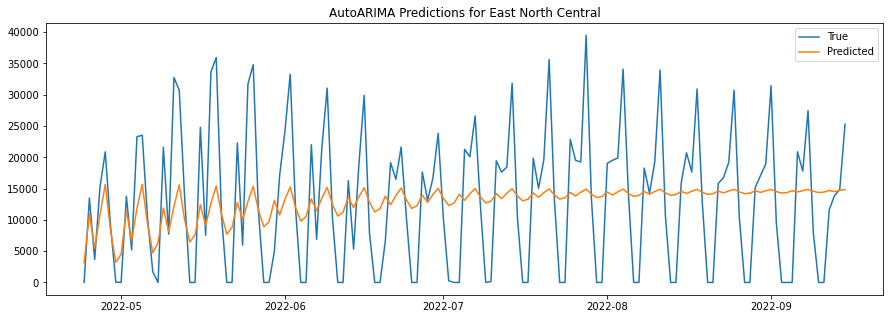


Training model for East South Central...
16483.99283256719
MAE: 8769.11
MSE: 123340474.54
RMSE: 11105.88
MASE: 2.65


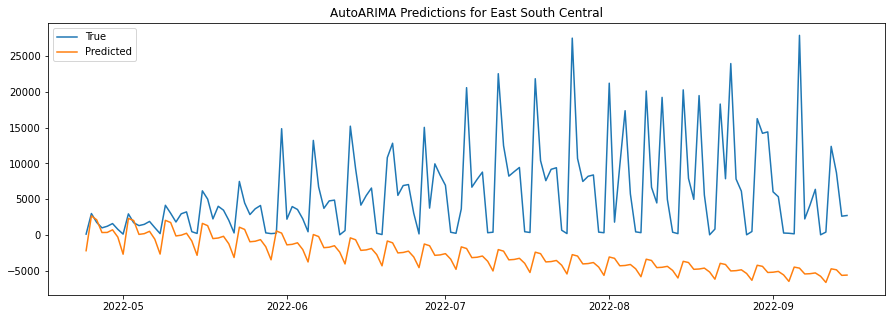


Training model for Mid-Atlantic...


KeyboardInterrupt: 

In [11]:
start_time = time.time()
for df in datasets:
    baseline_auto_arima2(df, plot=True)
    print("")
print(f"--- {round(time.time() - start_time, 2)} seconds ---")